<a href="https://colab.research.google.com/github/sunitadhotre/Artificial-Intelligence/blob/main/Day4_Assignment_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC




from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [3]:
bank = pd.read_csv("/content/Bankruptcy.csv")
bank.head(3)

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07


In [7]:
X= bank.drop('D',axis =1)
y = bank['D']

Linear Kernel

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=23)
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc(y_test, y_pred)

1.0

In [11]:
svm = SVC(C = 5.4,kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc(y_test, y_pred)

1.0

K-FOLD CV

In [12]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
svm = SVC(C = 1,kernel='linear')
results = cross_val_score(svm, X, y, cv=kfold)
results.mean()

0.9772079772079773

In [ ]:
Grid Search CV

In [13]:
params = {'C':[0.001, 0.01, 0.1, 1, 4.5, 5.4, 7.5, 10]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(svm, param_grid=params, cv=kfold) # Accuracy by default
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=SVC(C=1, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 4.5, 5.4, 7.5, 10]})

In [14]:
print(gcv.best_params_)

{'C': 0.01}


In [15]:
print(gcv.best_score_)

0.9923076923076923


With Log Loss


In [17]:
svm = SVC(probability=True,kernel='linear')
gcv = GridSearchCV(svm, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'C': 0.001}
-0.08101725526105288


Radial Kernel

In [18]:
params = {'C':[0.001, 0.01, 0.1, 1, 4.5, 5.4, 7.5, 10],
         'gamma':[0.001, 0.01, 0.1, 1, 4.5, 5.4, 7.5, 10]}
svm = SVC(probability=True,kernel='rbf')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(svm, param_grid=params, cv=kfold) # Accuracy by default
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'C': 1, 'gamma': 0.001}
0.9623931623931623


With Log Loss

In [19]:
params = {'C':[0.001, 0.01, 0.1, 1, 4.5, 5.4, 7.5, 10],
         'gamma':[0.001, 0.01, 0.1, 1, 4.5, 5.4, 7.5, 10]}
svm = SVC(probability=True,kernel='rbf')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(svm, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'C': 4.5, 'gamma': 0.001}
-0.0719999824777623


In [21]:
hr = pd.read_csv("/content/HR_comma_sep.csv")
hr.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low


In [ ]:
One Hot Encoding

In [22]:
dum_hr = pd.get_dummies(hr, drop_first=True)
dum_hr.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [23]:
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']

Linear SVM

In [24]:
svm = SVC(probability=True,kernel='linear')
gcv = GridSearchCV(svm, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

KeyboardInterrupt: ignored

Radial SVM

In [ ]:
params = {'C':[0.001, 0.01, 0.1, 1, 4.5, 5.4, 7.5, 10],
         'gamma':[0.001, 0.01, 0.1, 1, 4.5, 5.4, 7.5, 10]}
svm = SVC(probability=True,kernel='rbf')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(svm, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

Decision Trees

In [26]:
hr = pd.read_csv("/content/HR_comma_sep.csv")
dum_hr = pd.get_dummies(hr, drop_first=True)
dum_hr.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [27]:
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=23)

In [31]:
dtc = DecisionTreeClassifier(random_state=23, max_depth=2)
dtc.fit(X_train, y_train)
dtc

DecisionTreeClassifier(max_depth=2, random_state=23)

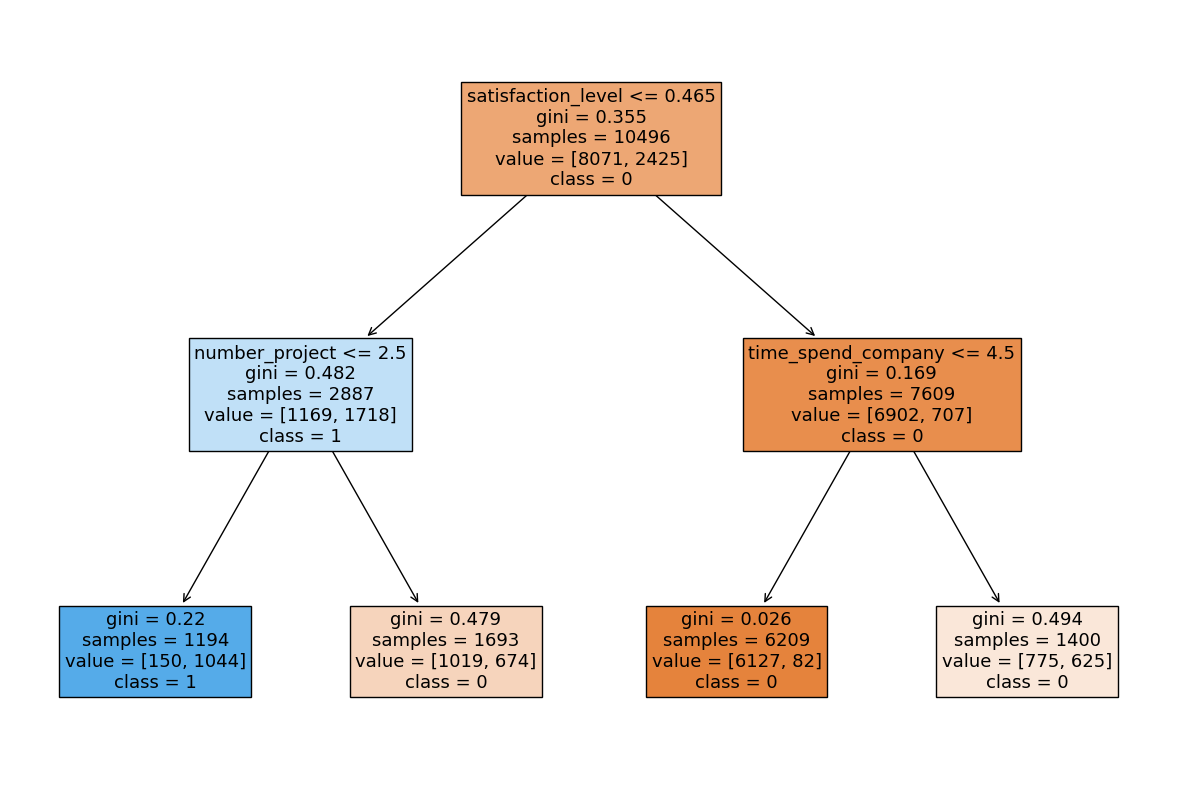

In [32]:
plt.figure(figsize=(15,10))
plot_tree(dtc,feature_names=X_train.columns,
               class_names=['0','1'],
               filled=True,fontsize=13)
plt.show()

In [33]:
X_test.loc[13730]

satisfaction_level          0.45
last_evaluation             0.42
number_project              4.00
average_montly_hours      156.00
time_spend_company          7.00
Work_accident               0.00
promotion_last_5years       0.00
Department_RandD            0.00
Department_accounting       0.00
Department_hr               0.00
Department_management       0.00
Department_marketing        0.00
Department_product_mng      1.00
Department_sales            0.00
Department_support          0.00
Department_technical        0.00
salary_low                  0.00
salary_medium               0.00
Name: 13730, dtype: float64

In [34]:
dtc.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [35]:
dtc = DecisionTreeClassifier(random_state=23, max_depth=5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(acc(y_test, y_pred))

0.9737719493220716


K-FOLD CV

In [36]:
dtc = DecisionTreeClassifier(random_state=23, max_depth=3)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
results = cross_val_score(dtc, X, y, cv=kfold)
results.mean()

0.952317439146382

In [37]:
params = {'max_depth':[2,3,4,5,6,None],
         'min_samples_split':[2, 5, 10, 30],
         'min_samples_leaf': [1, 10, 50]}
dtc = DecisionTreeClassifier(random_state=23)
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 10, 50],
                         'min_samples_split': [2, 5, 10, 30]},
             scoring='neg_log_loss')

In [38]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 30}
-0.10831472973424117


Fully Grown Tree

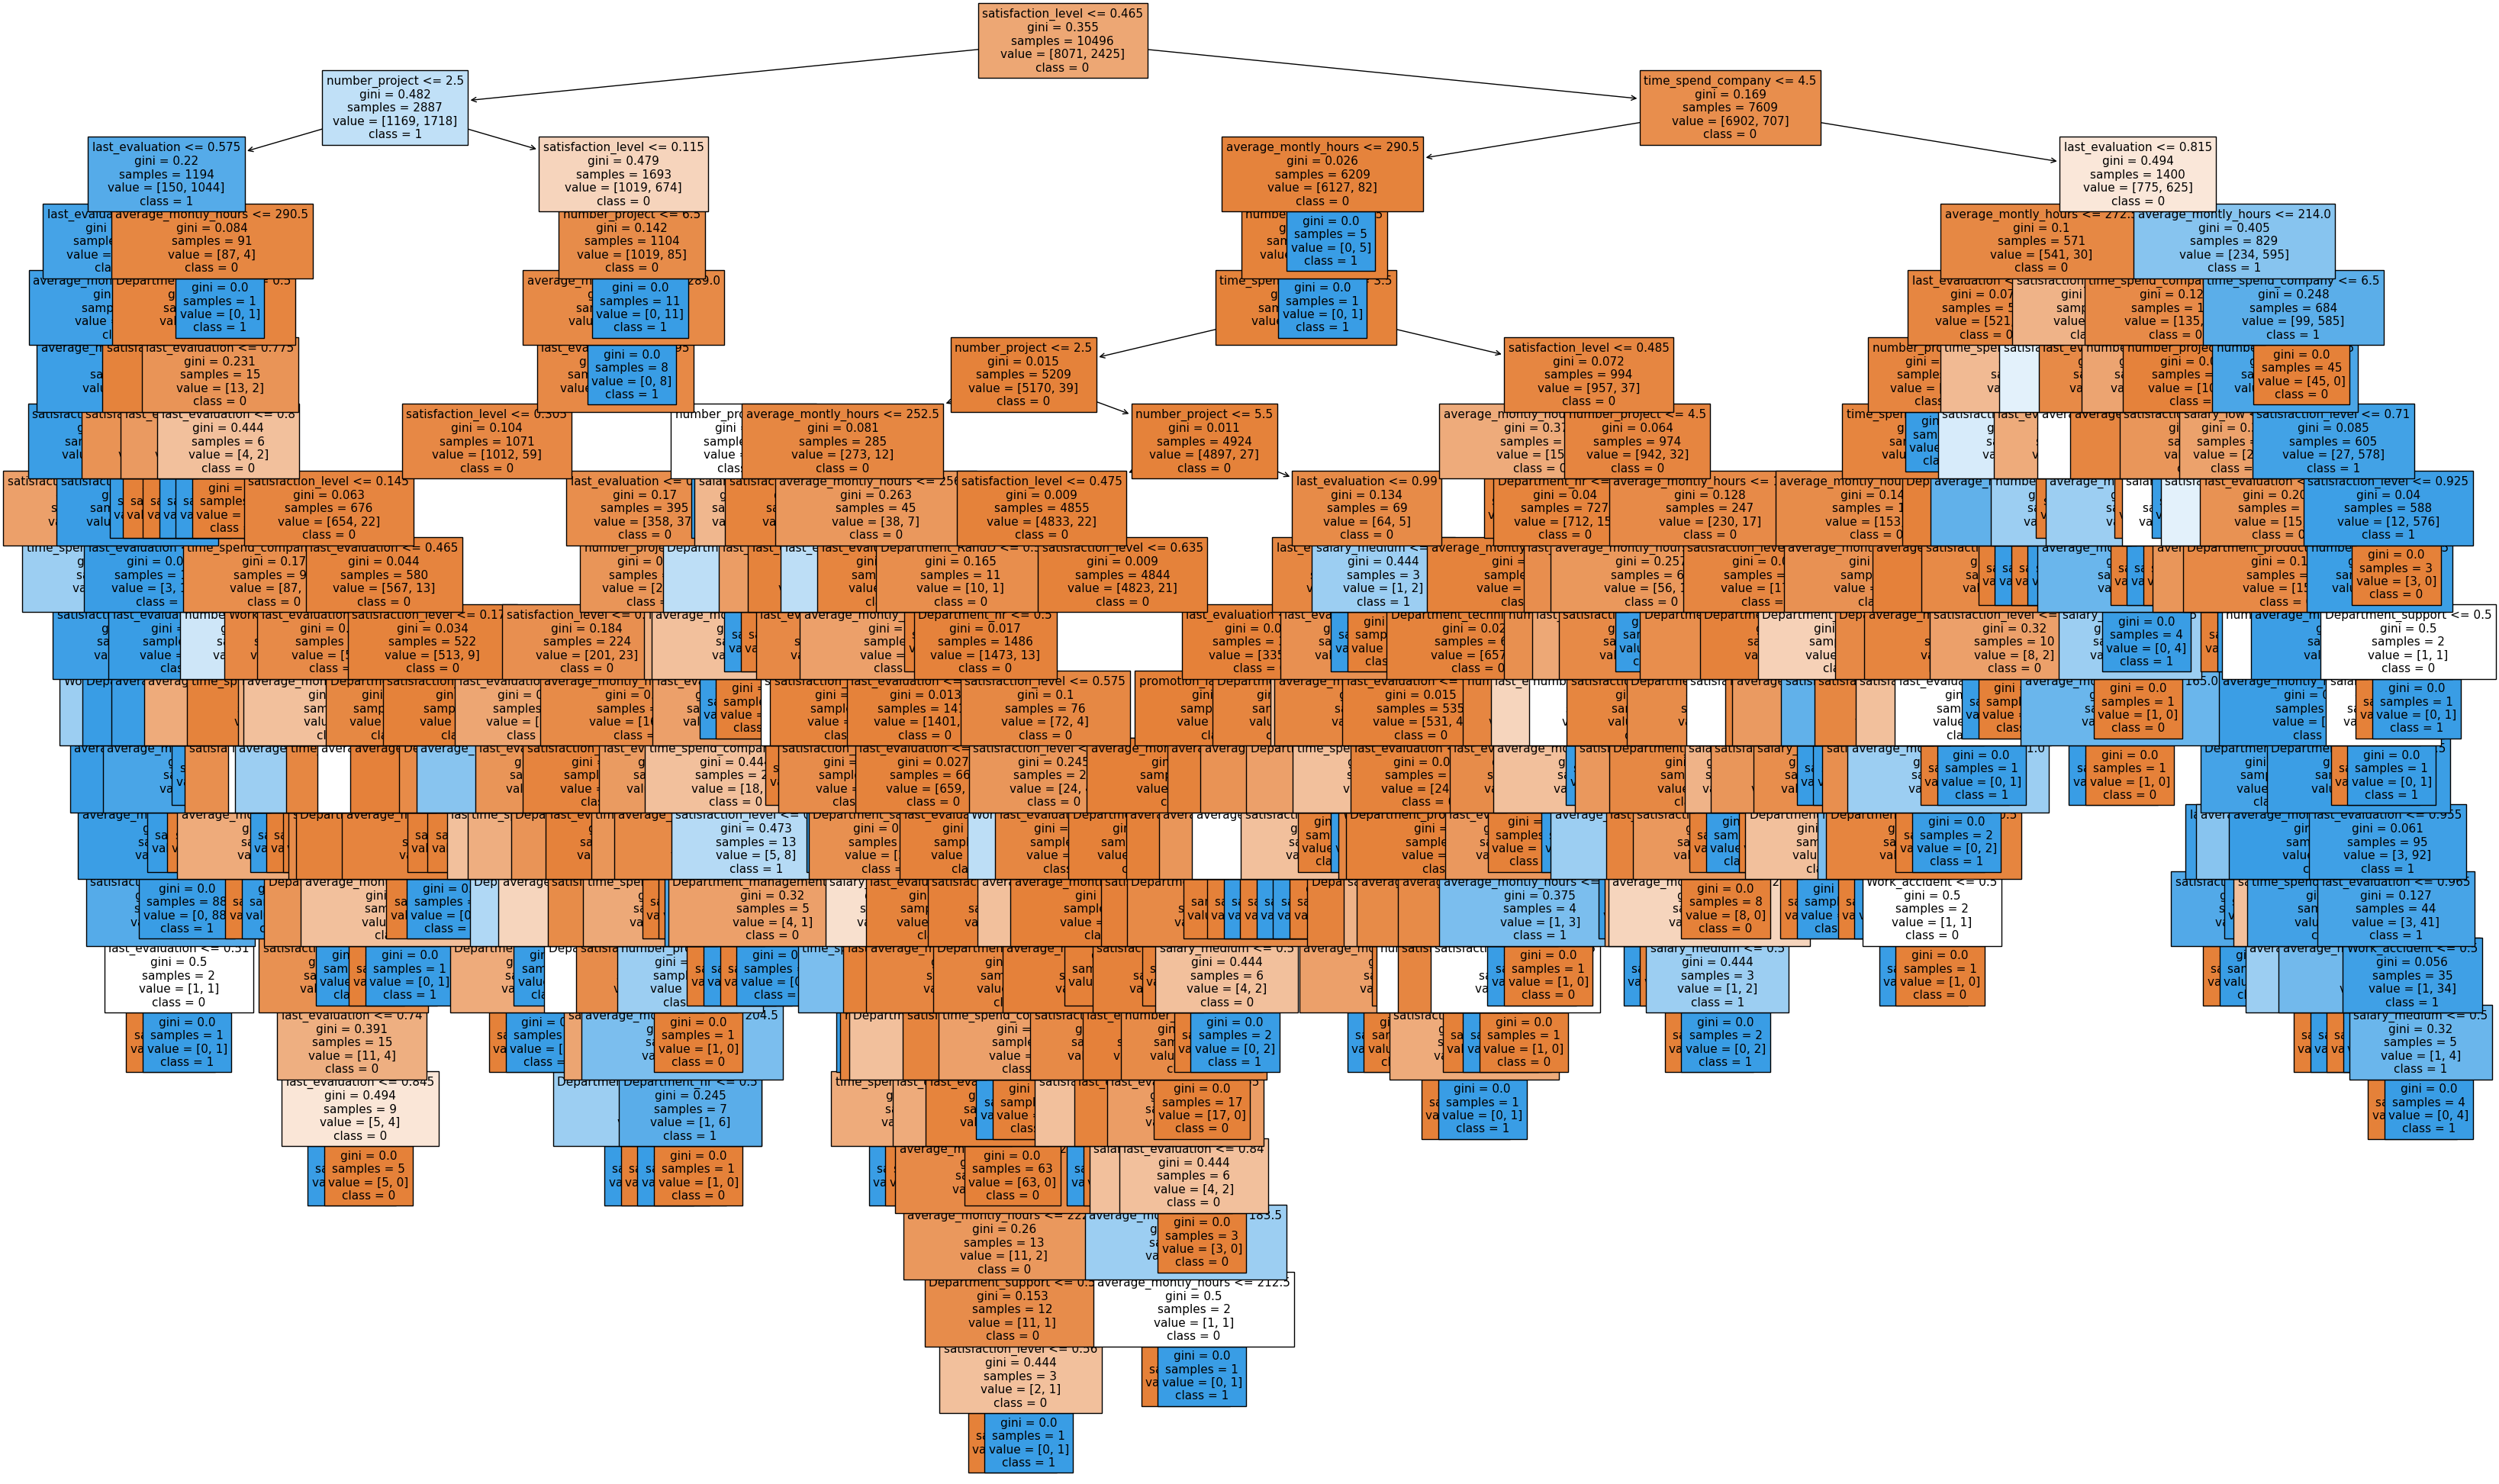

In [39]:
dtc = DecisionTreeClassifier(random_state=23, max_depth=None)
dtc.fit(X_train, y_train)
plt.figure(figsize=(40,25))
plot_tree(dtc,feature_names=X_train.columns,
               class_names=['0','1'],
               filled=True,fontsize=11)
plt.show()